In [10]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [11]:
inpath = "C:/Users/David/YELP_PROJECT/datasets/review_groups/Topic_output_1.csv"
inpath2 = "C:/Users/David/YELP_PROJECT/datasets/review_groups/output_9_topics.csv"
full_df = pd.read_csv(inpath2, encoding="ISO-8859-1")
full_df.head()

,business_id,1-2_Stars,1-2_Stars_count,4-5_Stars,4-5_Stars_count,1-2_Stars topic,4-5_Stars topic
0,iZyfmGeCF0KRdwq4YH5KrA,['1 star in my mind is generous. I will say th...,5,"[""I don't know what these other yelpers are co...",6,['way business cheese ni rita table coke strik...,['food chicken taco staff cabana tostada resta...
1,fyw7Ht1OXnA6b6rrXEpwdQ,"[""Wife & I tried out Ikos this evening for din...",2,['Not a fan of the new menu & increased prices...,10,NaN,['place salad food restaurant sauce flavor mea...
2,NfrrOcT5kg18Qprwsat5Fg,"[""After passing the Vic earlier in the day and...",14,"[""Try today's special - the kangaroo burger wi...",7,['patio server pork restaurant menu experience...,['order bar cheesy candy dark sit phone ice st...
3,ZiOvvKr0gwp3qH7Bu3YyTg,"[""This place you can tell tries real hard to g...",3,"[""Why do you have to be so hard to find!?!?!?!...",16,['food him amount math her meal time restauran...,['street menu dinner time sea bass guess bar f...
4,Ssj7rTGNUhYJ5H0GWtygzw,"[""I'm not a golfer, so my review is strictly f...",3,"[""I just recently attended a wedding reception...",5,['course place golf racism everyone room fundr...,['selection wedding swing water something par ...


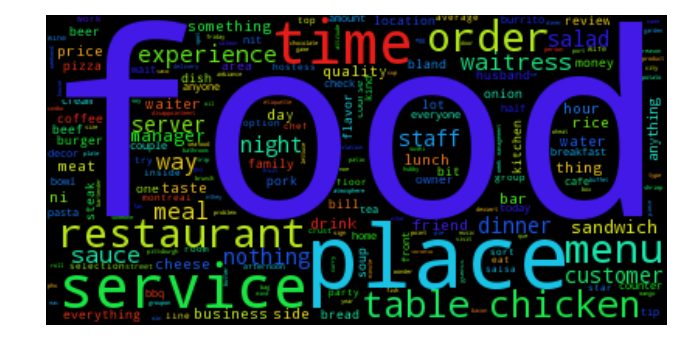

In [12]:
Bad_reviews = full_df['1-2_Stars topic'].tolist()
Bad_reviews = ''.join(str(v) for v in Bad_reviews)
Bad_reviews = Bad_reviews.replace('[','').replace(']','').replace("'",'').replace(',','')
wordcloud = WordCloud().generate(Bad_reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

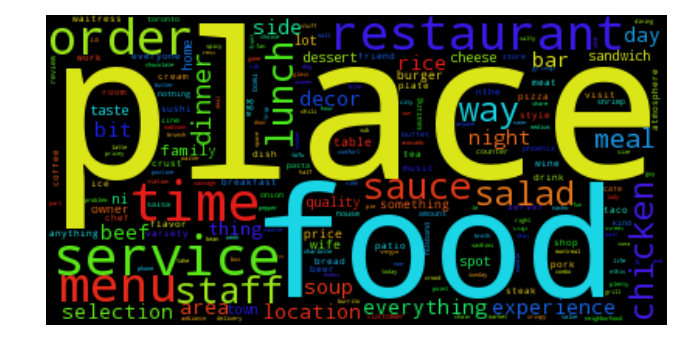

In [13]:
Good_reviews = full_df['4-5_Stars topic'].tolist()
Good_reviews = ''.join(str(v) for v in Good_reviews)
Good_reviews = Good_reviews.replace('[','').replace(']','').replace("'",'').replace(',','')
wordcloud = WordCloud().generate(Good_reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
badwordcount = Counter(Bad_reviews.split())
badwordcount = Counter.most_common(badwordcount)
badwordcount = pd.DataFrame.from_records(badwordcount, columns=['Word','Count'])

goodwordcount = Counter(Good_reviews.split())
goodwordcount = Counter.most_common(goodwordcount)
goodwordcount = pd.DataFrame.from_records(goodwordcount, columns=['Word','Count'])

totalcount = badwordcount.merge(goodwordcount, how='outer',on='Word').fillna(0)
totalcount.columns = ['Word','Badreviewcount','Goodreviewcount']
totalcount['Total'] = totalcount['Badreviewcount']+totalcount['Goodreviewcount']
totalcount['Average'] = totalcount['Total']/2
totalcount = totalcount.sort_values(by='Average', ascending=False)
totalcount.head()

,Word,Badreviewcount,Goodreviewcount,Total,Average
1,place,79.0,120.0,199.0,99.5
0,food,85.0,97.0,182.0,91.0
2,service,67.0,82.0,149.0,74.5
3,time,61.0,79.0,140.0,70.0
4,restaurant,54.0,62.0,116.0,58.0


# Analysis of topic word frequencies

 - Topic label frequencies for good reviews tend to be less varied than for bad reviews.  This is likely because good reviews tend to be shorter and more suscinct, while bad reviews tend to be more long-form and often inccorporate a specific story about why the reviewer was displeased with their experience.
 - The most common topic words are related to food - the word 'food' is the most commonly occuring topic, and most of the top 100 topics are names of food items (e.g., 'chicken', 'cheese', 'soup')
 - The top 100 topics can be grouped into three general categories - Food, Service, and Price.  I believe that from these categories we can likely deduce several subcategories of topic.
 - There are some words that I consider to be "junk" words - those that are included as topics because of the nature of restaraunt reviews, but provide no useful information.  For example, 'place' and 'restaraunt'.
 - It may be possible to give individual reviews tags that indicate the presence of one or more categories/subcategories within the review.  The idea is that I can assign words to categories, then use those words to train a supervised algorithm to categorize reviews.  I have yet to decide whether a word could be assigned to multiple categories.

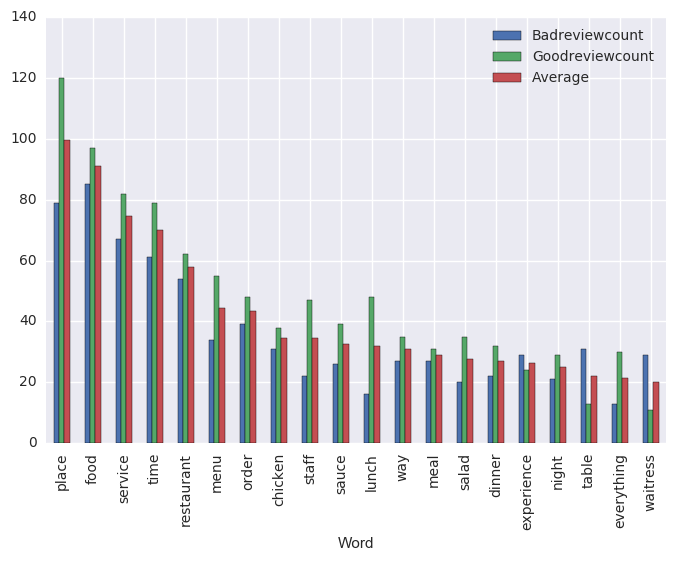

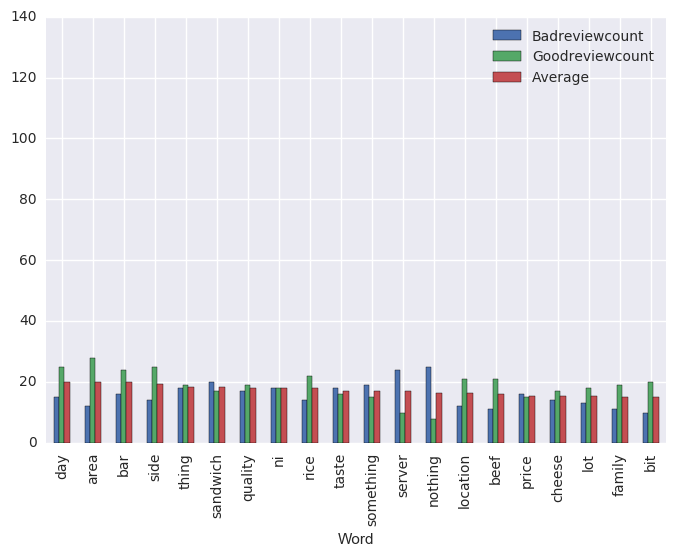

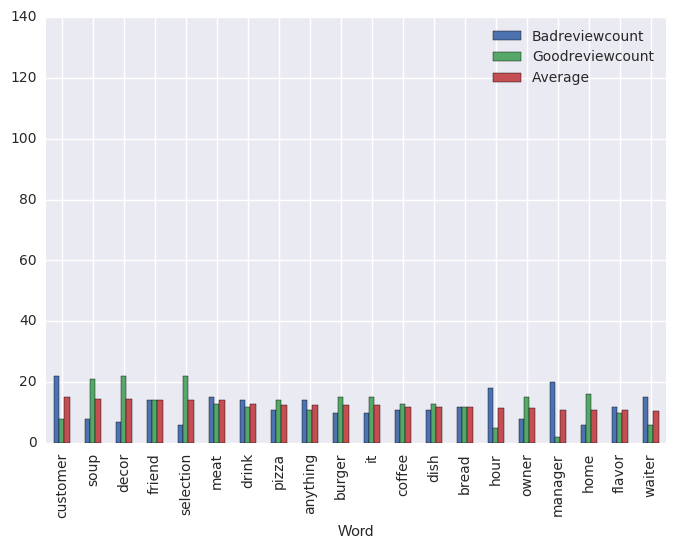

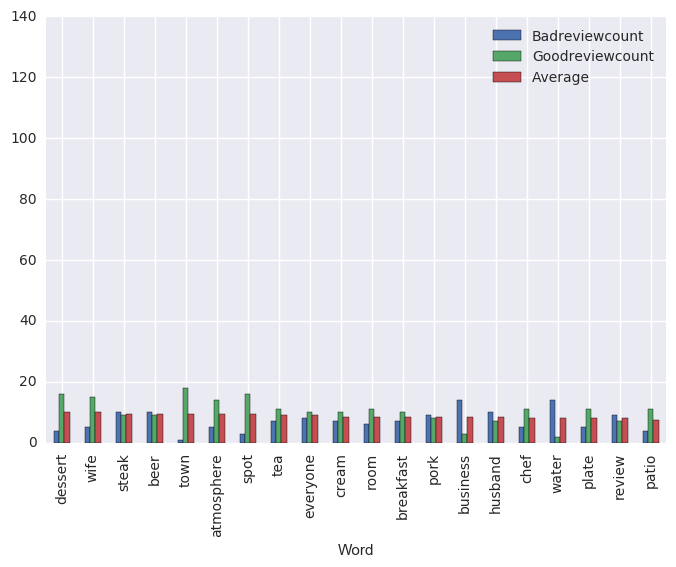

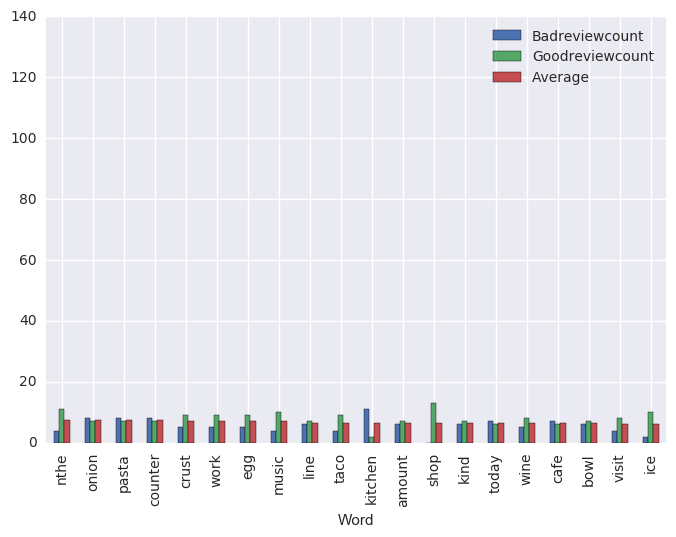

In [17]:
plotdf1 = totalcount.iloc[0:20]
plotdf1.plot(x="Word", y=["Badreviewcount", "Goodreviewcount", "Average"], kind="bar")
plt.ylim(0,140)
plt.show()

plotdf2 = totalcount.iloc[20:40]
plotdf2.plot(x="Word", y=["Badreviewcount", "Goodreviewcount", "Average"], kind="bar")
plt.ylim(0,140)
plt.show()

plotdf3 = totalcount.iloc[40:60]
plotdf3.plot(x="Word", y=["Badreviewcount", "Goodreviewcount", "Average"], kind="bar")
plt.ylim(0,140)
plt.show()

plotdf3 = totalcount.iloc[60:80]
plotdf3.plot(x="Word", y=["Badreviewcount", "Goodreviewcount", "Average"], kind="bar")
plt.ylim(0,140)
plt.show()

plotdf3 = totalcount.iloc[80:100]
plotdf3.plot(x="Word", y=["Badreviewcount", "Goodreviewcount", "Average"], kind="bar")
plt.ylim(0,140)
plt.show()

In [18]:
wordlist = totalcount['Word'].iloc[0:1000]

In [19]:
totalcount.to_csv("C:/Users/David/YELP_PROJECT/datasets/lda_analysis/topics_analysis.csv")

In [20]:
path = "C:/Users/David/YELP_PROJECT/datasets/lda_analysis/topics_analysis_tagged.csv"
topicanalysis = pd.read_csv(path, encoding="ISO-8859-1")
topicanalysis = topicanalysis.iloc[0:500]
topicanalysis.head()

,Index,Word,Badreviewcout,Goodreviewcout,Total,Desert,Red Meat/Poultry,Fish/Seafood,Sandwich/Wrap/Burger,Mexican style: Salsa/Burrito/Taco/Enchilada,...,Salad/Veggies,Food - Other,Food,Location,NA/need context/not relevant,Price,Decor/Atmosphere,Food Description,Drinks,Service/Staff
0,1,place,79,120,199,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN
1,2,food,85,97,182,NaN,NaN,NaN,NaN,NaN,...,NaN,y,y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,service,67,82,149,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
3,4,time,61,79,140,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN
4,5,restaurant,54,62,116,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN


In [21]:
newpath = "C:/Users/David/YELP_PROJECT/datasets/cleaned_chunks/output_62.csv"

Topiclist = topicanalysis.columns.tolist()
Topiclist = Topiclist[5:]
Classification_Dict = {} # Initiate empty dictionary
tagged_df = pd.read_csv(newpath, encoding="ISO-8859-1")
for T in Topiclist:
    Classification_Dict[T] = topicanalysis['Word'][topicanalysis[T]=='y'].tolist()

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk import word_tokenize
lemma = WordNetLemmatizer()
stopWords = stopwords.words('english')
stopWords.extend(('go','wo','get','nthe','also','re','ni','ve','ni','\r\n\r\n'))

for key, value in Classification_Dict.items():
    topicarray = []
    for index, line in tagged_df.iterrows():
        if any(v in str(line['text']) for v in value):
            topicarray.append(1)
        else:
            topicarray.append(0)
    tagged_df[key] = topicarray
clean_list = []
for index, line in tagged_df.iterrows():
    text = line['text']
    tokens1 = text
    tokens1 = word_tokenize(str(text).lower())
    filtered1 = [lemma.lemmatize(word) for word in tokens1]
    filtered1 = [word for word in filtered1 if word not in stopWords]
    filtered1 = [word for word in filtered1 if word not in string.punctuation]
    filtered1 = str(filtered1)
    filtered1 = filtered1.replace(',', '').replace('[', '').replace(']', '')
    clean_list.append(filtered1)
tagged_df['cleaned_text'] = clean_list
tagged_df = tagged_df[['Unnamed: 0','user_id','review_id','text','cleaned_text','business_id','stars','date','type','Service/Staff','Price','Decor/Atmosphere','Location','Drinks','Food']]
tagged_df.head()

In [29]:
len(tagged_df)

36774

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df=0)
def make_xy(tagged_df, col_name, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(tagged_df.cleaned_text)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (tagged_df[col_name] == 1).values.astype(np.int)
    return X, y
X, y = make_xy(tagged_df,'Location')

In [31]:
from sklearn.naive_bayes import MultinomialNB
#your turn
from sklearn.model_selection import train_test_split
#Split in train and test sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=5)
#Train model
clf = MultinomialNB()
clf = clf.fit(xtrain, ytrain)
print('Training accuracy score: %0.2f%%' % (100 * clf.score(xtrain, ytrain)))
print('Test accuracy score: %0.2f%%' % (100 * clf.score(xtest, ytest)))

Training accuracy score: 93.45%
Test accuracy score: 87.34%


In [32]:
test_sample = tagged_df.sample(n=100)

In [34]:
testpath = "C:/Users/David/YELP_PROJECT/datasets/manual_label_prep.csv"
test_sample.to_csv(testpath)